# Preprocesiranje podataka

## Potrebne bilioteke

In [1]:
import pandas

In [2]:
import matplotlib.pyplot as plt

## Učitavanje podataka

In [3]:
data = pandas.read_csv("Podaci/iris.csv")

In [4]:
data.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Podela skupa podataka

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = list(data.columns[:-1])
features

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [7]:
X = data[features]
X.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = data["Species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


## Standardizacija

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
std_scaler = StandardScaler()
std_scaler.fit(X)
X_std = std_scaler.transform(X)
X_std = pandas.DataFrame(X_std, columns=features)

In [12]:
X_std.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [13]:
X_std.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [14]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X)
X_mm = mm_scaler.transform(X)
X_mm = pandas.DataFrame(X_mm, columns=features)

In [15]:
X_mm.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [16]:
X_mm.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [17]:
X1 = mm_scaler.inverse_transform(X_mm)
X1 = pandas.DataFrame(X1, columns=features)
X1.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Frekvencijske matrice

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

Mali korpus tekstova za islustrovanje formiranja frekvencijske matrice:

In [19]:
corpus = ["Chinese Beijing Chinese", 
         "Chinese Chinese Changhai",
          "Chinese Macao",
         "Tokyo Japan Chinese"]

classes = ["yes", "yes", "yes", "no"]

In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)
X

<4x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [21]:
X_df = pandas.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
X_df

/home/ppc/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,beijing,changhai,chinese,japan,macao,tokyo
0,1,0,2,0,0,0
1,0,1,2,0,0,0
2,0,0,1,0,1,0
3,0,0,1,1,0,1


## Analiza glavnih komponenata

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
pca.fit(X_std)
X_pca = pca.transform(X_std)

In [24]:
pca_names = [f"pca_{i}" for i in range(len(features))]
X_pca_df = pandas.DataFrame(X_pca, columns=pca_names)
X_pca_df.head(5)

,pca_0,pca_1,pca_2,pca_3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


<BarContainer object of 4 artists>

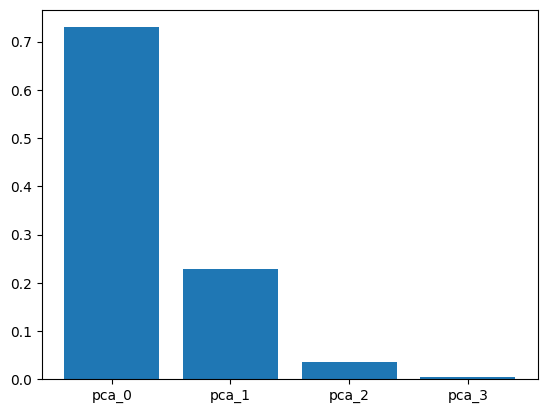

In [25]:
plt.bar(pca_names, pca.explained_variance_ratio_)

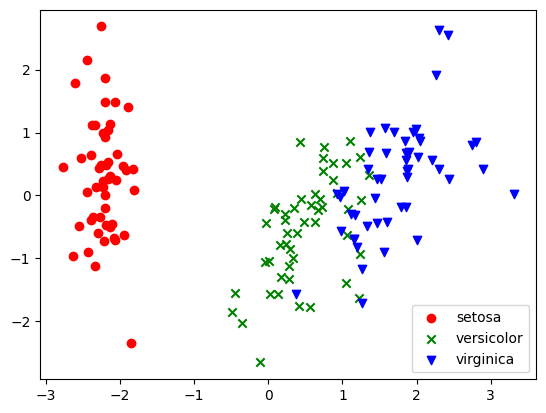

In [26]:
colors = ["red", "green", "blue"]
marker = ['o', 'x', 'v']
class_names = y.unique()
for i, class_name in enumerate(class_names):
    class_instances = X_pca_df.iloc[y[y == class_name].index]
    plt.scatter(class_instances["pca_0"], class_instances["pca_1"], c=colors[i], label=class_name, marker=marker[i])
    
plt.legend(loc="best")